# Линейная регрессия

### Подключаем необходимые пакеты

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Импортируем входные данные
Входные комнаты и цены.

In [2]:
features = np.array([1, 2, 3, 5, 6, 7])
labels = np.array([155, 197, 244, 356, 407, 448])

# Выводим данные для проверки
print("Количество комнат:", features)
print("Цены:", labels)

Количество комнат: [1 2 3 5 6 7]
Цены: [155 197 244 356 407 448]


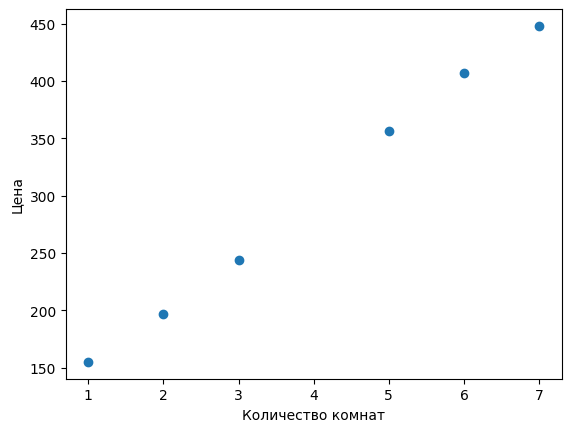

In [3]:
# Визуализируем входные значения
utils.plot_points(features, labels)

## Обновляем параметры ценообразования
### Функция для градиентного обновления коэффициентов (метод квадратичной ошибки)
Обновляет параметры модели линейной регрессии с использованием квадратичной ошибки.
- base_price: начальная базовая цена
- price_per_room: начальная цена за одну комнату
- num_rooms: количество комнат в текущем примере
- price: реальная цена жилья
- learning_rate: скорость обучения

In [10]:
# Функция для градиентного обновления коэффициентов (метод квадратичной ошибки)
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room * num_rooms
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    base_price += learning_rate * (price - predicted_price)
    return price_per_room, base_price

### Запуск алгоритма линейной регрессии
#### Это основная функция для обучения линейной регрессии методом стохастического градиентного спуска.
- features: массив признаков (количество комнат)
- labels: массив значений (цены жилья)
- learning_rate: скорость обучения
- epochs: количество итераций

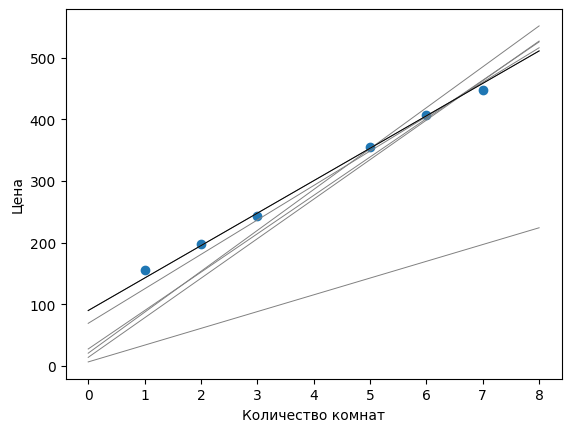

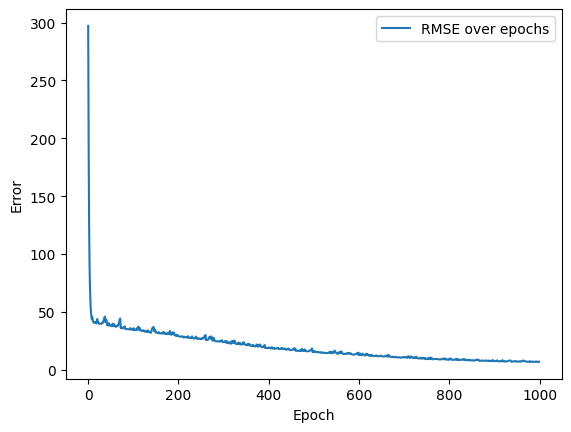

Обученная цена за комнату: 52.7014
Обученная базовая цена: 89.7227


In [15]:
def linear_regression(features, labels, learning_rate=0.01, epochs=1000):
    price_per_room = random.random()  # Инициализация случайного коэффициента
    base_price = random.random()  # Инициализация случайного базового смещения
    errors = []  # Список для хранения ошибок
    
    for epoch in range(epochs):
        i = random.randint(0, len(features) - 1)  # Выбираем случайный индекс
        num_rooms = features[i]
        price = labels[i]
        
        # Обновляем коэффициенты модели
        price_per_room, base_price = square_trick(base_price, price_per_room, num_rooms, price, learning_rate)
        
        # Оцениваем ошибку (RMSE) и сохраняем
        predictions = features * price_per_room + base_price
        error = np.sqrt(np.mean((labels - predictions) ** 2))
        errors.append(error)
        
        # Визуализация линий на разных этапах обучения
        if epoch in [1, 10, 50, 100, 500, 999]:
            utils.draw_line(price_per_room, base_price, starting=0, ending=8)
    
    # Финальный график с предсказанной прямой
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    plt.show()
    
    # График изменения ошибки
    plt.plot(errors, label='RMSE over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()
    
    print(f'Обученная цена за комнату: {price_per_room:.4f}')
    print(f'Обученная базовая цена: {base_price:.4f}')
    
    return price_per_room, base_price

# Обучаем модель
price_per_room, base_price = linear_regression(features, labels, learning_rate=0.01, epochs=1000)

### Функция предсказания на новых данных

In [16]:
# Функция предсказания на новых данных
def predict_price(num_rooms, price_per_room, base_price):
    """
    Возвращает предсказанную цену для заданного количества комнат.
    num_rooms: количество комнат
    price_per_room: обученный коэффициент
    base_price: обученная базовая цена
    """
    return base_price + price_per_room * num_rooms

# Пример предсказания для 4-комнатной квартиры
new_feature = 4
predicted_price = predict_price(new_feature, price_per_room, base_price)
print(f'Предсказанная цена для {new_feature} комнат: {predicted_price:.2f}')

Предсказанная цена для 4 комнат: 300.53
